In [159]:
import re
from collections import deque

In [17]:
with open('data/input_17.txt') as fh:
    file_input = fh.read()

In [5]:
test_input = """x=495, y=2..7
y=7, x=495..501
x=501, y=3..7
x=498, y=2..4
x=506, y=1..2
x=498, y=10..13
x=504, y=10..13
y=13, x=498..504"""

In [6]:
test_input.split('\n')

['x=495, y=2..7',
 'y=7, x=495..501',
 'x=501, y=3..7',
 'x=498, y=2..4',
 'x=506, y=1..2',
 'x=498, y=10..13',
 'x=504, y=10..13',
 'y=13, x=498..504']

In [487]:
def gen_wall(inp):
    inp = inp.strip()
    wall = set([])
    miny = 1 << 32
    maxy = 0
    for line in inp.split('\n'):    
        args = list(map(int, re.findall('\d+', line)))
        if line.startswith('x'):
            for i in range(args[1], args[2]+1):
                wall.add((args[0], i))
                if i > maxy:
                    maxy = i
                if i < miny:
                    miny = i
        else:
            if args[0] > maxy:
                maxy = args[0]
            if args[0] < miny:
                miny = args[0]
            for i in range(args[1], args[2]+1):
                wall.add((i, args[0]))
    return wall, miny, maxy

def fill_sides(x, y, wall, water, water_settled):    
    # print('fs ', x, y)
    stack = [(x, y,-1), (x, y, +1)]
    xmin= x
    xmax= x
    ret = set([])
    dx = 0
    water.add((x, y))
    while (stack):
        _x, _y, dx = stack.pop()
        if _x < xmin:
            xmin = _x
        if _x > xmax:
            xmax = _x
            
        if (_x, _y+1) not in wall and (_x, _y+1) not in water_settled:
            water.add((_x, _y+1))
            ret.add((_x, _y+1))
            continue
        
        if (_x+dx, _y) not in wall:
            water.add((_x+dx, _y))
            stack.append((_x+dx, _y, dx))            
    #print(ret)
    if len(ret) == 0:
#         print(xmin, xmax, y)
        for i in range(xmin, xmax+1):
            water_settled.add((i, y))
    return water, water_settled, ret    

def water_fill(inp):
    wall, miny, maxy = gen_wall(inp)
    stack_down = deque([(500, 0)])
    #stack_sides = deque([])
    water = set([])
    water_settled = set([])
    i = 0
    #last_down = []
    #while True:
    #while (stack_down or stack_sides or last_down) and i < 300:        
    while stack_down: # and i < 89999:
        if i > 89912:
            print (len(stack_down), stack_down)
    
        if stack_down:
            _x, _y = stack_down.popleft()

            #last_down.append((_x, _y))
        
        # print (_x, _y)
        if (_x, _y+1) not in wall and (_x, _y+1) not in water:
            if (_y+1) > maxy:
                continue
                print(i, stack_down)
                return water, water_settled, wall, stack_down, stack_sides, i
            else:
                stack_down.append((_x, _y+1))
                if ((_y+1) <= maxy) and ((_y+1) >= miny):
                    water.add((_x, _y+1))
        else:
            water, water_settled, to_add = fill_sides(_x, _y, wall, water, water_settled)
            if to_add:
                while to_add:
                    add = to_add.pop()
                    if add not in stack_down:
                        stack_down.append(add)
            else:
                stack_down.append((_x, _y-1))
                #print(_x, _y-1)
        i += 1
    return water, water_settled, wall, stack_down, stack_sides, i

def vis(water, water_settled, wall, xr=[494, 508], yr=[1, 14]):
    print ("{:05d}".format(0), "".join(str(i%10) for i in range(xr[0], xr[1])))
    for j in range(yr[0], yr[1]):
        line = []
        for i in range(xr[0], xr[1]):
            if (i, j) in wall:
                line.append("#")
            elif (i, j) in water_settled:
                line.append('~')
            elif (i, j) in water:
                line.append('|')
            else:
                line.append('.')
        print ("{:05d}".format(j), "".join(line))
    #return water_list

In [499]:
water, water_settled, wall, stack_down, stack_sides, i = water_fill(test_input)

water, wall, stack_down, stack_sides, i

In [500]:
vis(water, water_settled, wall)

00000 45678901234567
00001 ......|.....#.
00002 .#..#||||...#.
00003 .#..#~~#|.....
00004 .#..#~~#|.....
00005 .#~~~~~#|.....
00006 .#~~~~~#|.....
00007 .#######|.....
00008 ........|.....
00009 ...|||||||||..
00010 ...|#~~~~~#|..
00011 ...|#~~~~~#|..
00012 ...|#~~~~~#|..
00013 ...|#######|..


Test case

In [501]:
print(len(water), len(water_settled))

57 29


In [502]:
%%time
water, water_settled, wall, stack_down, stack_sides, i = water_fill(file_input)
print(i)

6534
CPU times: user 170 ms, sys: 4 ms, total: 174 ms
Wall time: 191 ms


stack_down, stack_sides, i

Solution A + B

In [503]:
len(water), len(water_settled)

(29063, 23811)

In [504]:
xr = (500)
vis(water, water_settled, wall, xr=[xr, xr+140], yr=[1280, 1300])

00000 01234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890123456789
01280 .........................|....................|#~~~~~~~~#...#......#.......................#.#........|.....................................
01281 .........................|....................|#~~~~~~~~#####......#.......................#.#........|.....................................
01282 .........................|....................|#~~~~~~~~~~~~~~~~~~~#.......................#.#........|.....................................
01283 .........................|....................|#~~~~~~~~~~~~~~~~~~~#.......................#.#........|.....................................
01284 .........................|....................|#~~~~~~~~~~~~~~~~~~~#.......................#.#........|.....................................
01285 .........................|....................|#~~~~~~~~~~~~~~~~~~~#.......................#.#........|.........

In [506]:
xr = (400)
vis(water, water_settled, wall, xr=[xr, xr+140], yr=[1880, 1920])

00000 01234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890123456789
01880 ..............................|#~~~~~~~~~~~~~~~~~~~~#.....|#~~~~~~~~~~~~~~~#|...............................................................
01881 ..............................|#~~~~~~~~~~~~~~~~~~~~#.....|#~~~~~~~~~~~~~~~#|...............................................................
01882 ..............................|#~~~~~~~~~#~~~~#~~~~~#.....|#~~~~~~~~~~~~~~~#|...............................................................
01883 ..............................|#~~~~~~~~~#~~~~#~~~~~#.....|#~~~~~~~~~~~~~~~#|...............................................................
01884 ..............................|#~~~~~~~~~######~~~~~#.....|#~~~~~~~~~~~~~~~#|...............................................................
01885 ..............................|#~~~~~~~~~~~~~~~~~~~~#.....|#################|...................................

In [508]:
xr = (450)
vis(water, water_settled, wall, xr=[xr, xr+140], yr=[0, 1920])

00000 01234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890123456789
00000 ............................................................................................................................................
00001 ............................................................................................................................................
00002 ............................................................................................................................................
00003 ............................................................................................................................................
00004 ............................................................................................................................................
00005 ................................................................................................................

In [532]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 100)

In [533]:

minx  = min(wall, key=lambda x: x[0])[0]
maxx  = max(wall, key=lambda x: x[0])[0]
miny  = min(wall, key=lambda x: x[1])[1]
maxy  = max(wall, key=lambda x: x[1])[1]

field = np.zeros((maxx - minx + 1, maxy+1))
for x, y in wall:
    field[x-minx, y] = 1
for x, y in water:
    field[x-minx, y] = 2
for x, y in water_settled:
    field[x-minx, y] = 3

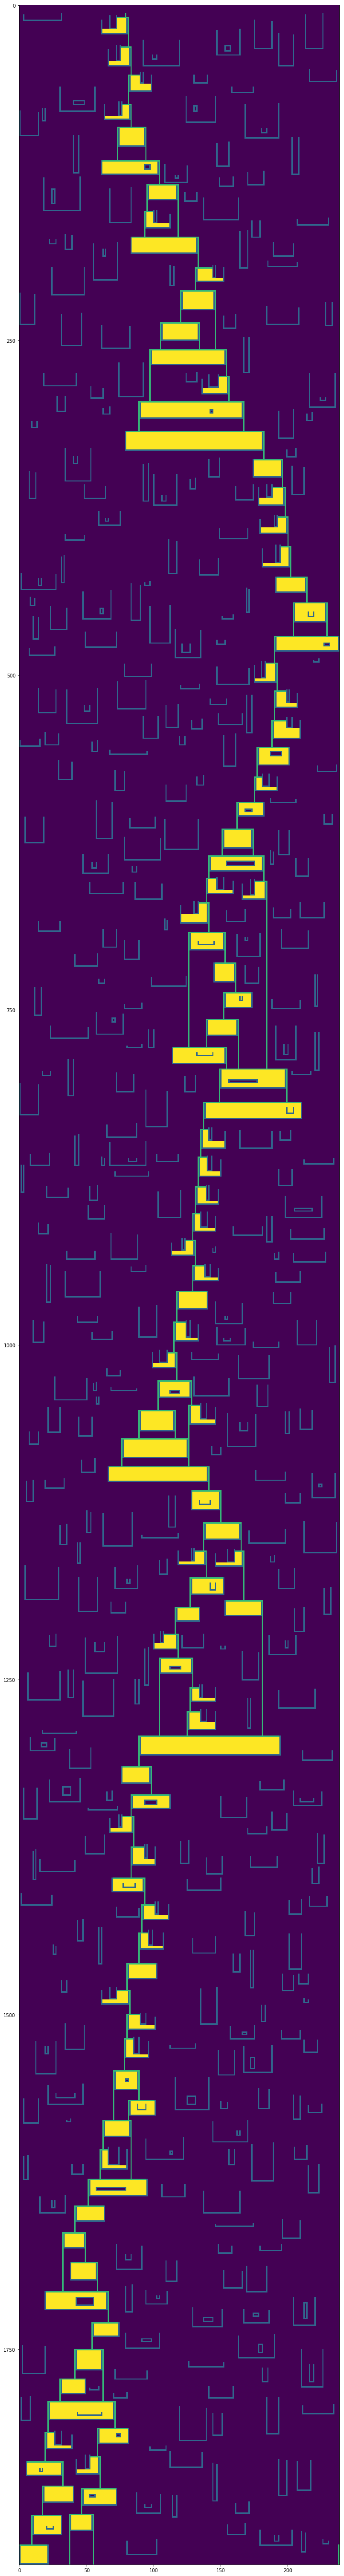

In [539]:
plt.imshow(field.T) 
plt.savefig()